#Assigment 5
###XLST Artificial Intelligence D01 Spring 2024
######*Chris Nolan*

Problem 1: Optimum Design of an I-beam
<br>
Your main task here is to use the GA package in Google Colab  (R) to perform multi-objective engineering design optimization for a load-bearing I-beam
<br><br>
First we will have to import some libraries to help us solve this problem

In [1]:
# genetic algorithms
install.packages('GA')

# statistical graphics
install.packages('ggplot2')

# used to create plots and charts, including line charts
# scatter plots, bar charts , histograms, etc.
install.packages('plotly')

# Loading the needed libraries
library(GA)
library(plotly)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘foreach’, ‘iterators’, ‘Rcpp’, ‘RcppArmadillo’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘later’, ‘htmlwidgets’, ‘lazyeval’, ‘crosstalk’, ‘promises’


Loading required package: foreach

Loading required package: iterators

Package 'GA' version 3.2.4
Type 'citation("GA")' for citing this R package in publications.


Attaching package: ‘GA’


The following object is masked from ‘package:utils’:

    de


Loading required package: ggplot2


Attaching package: ‘plotly’


The following object is masked from ‘package:ggplot2’:

    last_plot


The following object is masked from ‘package:stats’:

    filter


The following object is masked from ‘package:graphics’:

    layout




Next I will define the three equations that we will need to try and minimize. One being cross section area, the second being static deflection, and the thrid is both of the previous equations combined.

In [7]:
#Weight control variable
a <- 0.5

#Combined
combined <- function(x1, x2, x3, x4)
{
  a*(((2*x2)*x4)+(x3*(x1-(2*x4)))) + (1-a)*(60000/((x3*(x1-2*x4)^3) +2*x2*x4*((4*x4^2)+3*x1*(x1+(-2*x4)))))
}

#Cross Section Area
crossSectionArea <- function(x1, x2, x3, x4)
{
  ((2*x2)*x4)+(x3*(x1-(2*x4)))
}

#Static Deflection
staticDeflection <- function(x1, x2, x3, x4)
{
  60000/((x3*(x1-2*x4)^3) +2*x2*x4*((4*x4^2)+3*x1*(x1+(-2*x4))))
}

# Parameters constraints
x1 <- seq(10, 80, by = 0.5)
x2 <- seq(10, 50, by = 0.5)
x3 <- x4 <- seq(0.9, 5, by = 0.1)

Now that our equations are defined we can use Genetic Algs to find the best possible solution for our 4 variables starting with Cross Section Area

── Genetic Algorithm ─────────────────── 

GA settings: 
Type                  =  real-valued 
Population size       =  50 
Number of generations =  1000 
Elitism               =  2 
Crossover probability =  0.75 
Mutation probability  =  0.01 
Search domain = 
      x1 x2  x3  x4
lower 10 10 0.9 0.9
upper 80 50 5.0 5.0

GA results: 
Iterations             = 571 
Fitness function value = -28.10303 
Solution = 
           x1       x2        x3        x4
[1,] 11.37608 10.49174 0.9334246 0.9146132

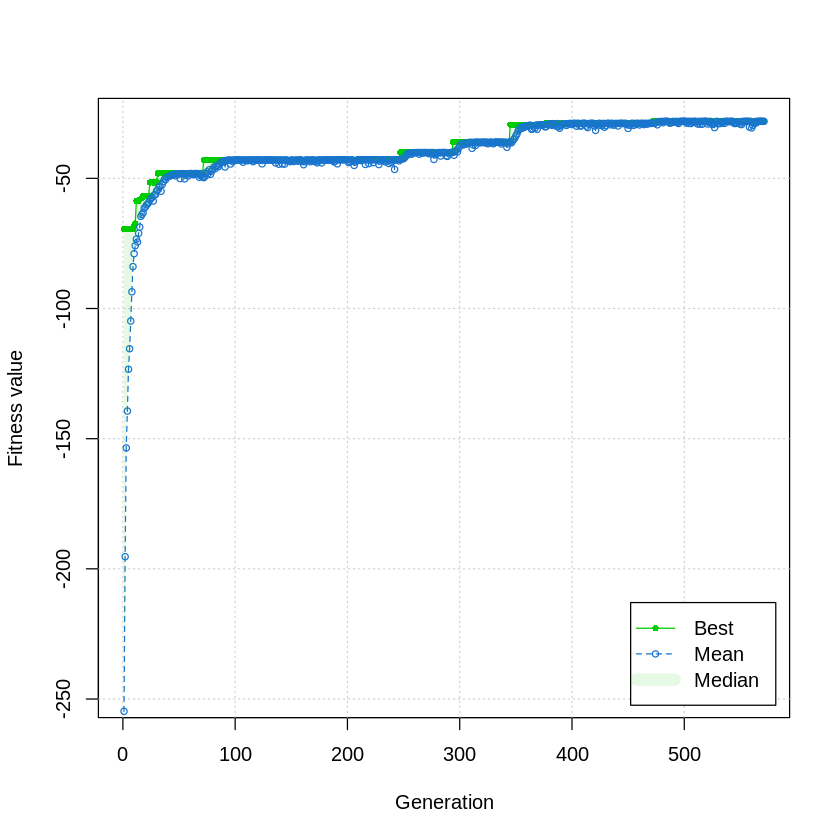

In [16]:
GA <- ga(type = "real-valued",
         fitness =  function(x) -crossSectionArea(x[1], x[2], x[3], x[4]),
         lower = c(10, 10, 0.9, 0.9), upper = c(80, 50, 5, 5),
         popSize = 50, maxiter = 1000, run = 100, pcrossover = 0.75, pmutation = 0.01 )

summary(GA)
plot(GA)

Next we can take a look at Static Deflection

── Genetic Algorithm ─────────────────── 

GA settings: 
Type                  =  real-valued 
Population size       =  50 
Number of generations =  1000 
Elitism               =  2 
Crossover probability =  0.75 
Mutation probability  =  0.01 
Search domain = 
      x1 x2  x3  x4
lower 10 10 0.9 0.9
upper 80 50 5.0 5.0

GA results: 
Iterations             = 266 
Fitness function value = -0.006564392 
Solution = 
           x1       x2       x3       x4
[1,] 77.08742 49.27166 4.992551 4.949143

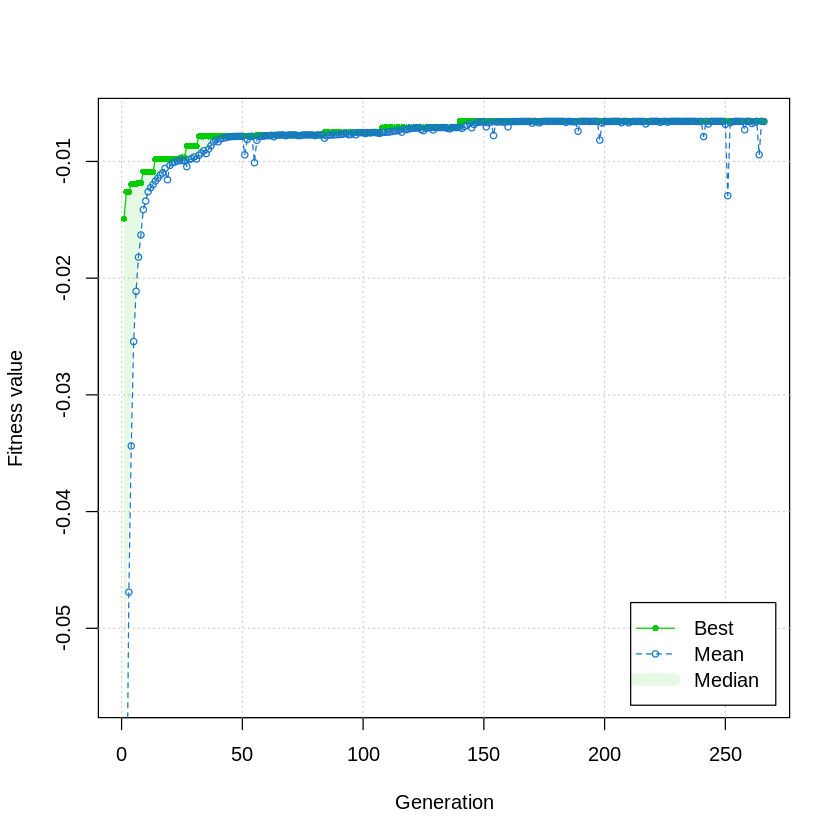

In [14]:
GA <- ga(type = "real-valued",
         fitness =  function(x) -staticDeflection(x[1], x[2], x[3], x[4]),
         lower = c(10, 10, 0.9, 0.9), upper = c(80, 50, 5, 5),
         popSize = 50, maxiter = 1000, run = 100, pcrossover = 0.75, pmutation = 0.01 )

summary(GA)
plot(GA)

And finally we can look at both of the functions combined

── Genetic Algorithm ─────────────────── 

GA settings: 
Type                  =  real-valued 
Population size       =  50 
Number of generations =  1000 
Elitism               =  2 
Crossover probability =  0.75 
Mutation probability  =  0.01 
Search domain = 
      x1 x2  x3  x4
lower 10 10 0.9 0.9
upper 80 50 5.0 5.0

GA results: 
Iterations             = 336 
Fitness function value = -17.66316 
Solution = 
           x1       x2        x3        x4
[1,] 14.96444 10.24672 0.9038426 0.9245471

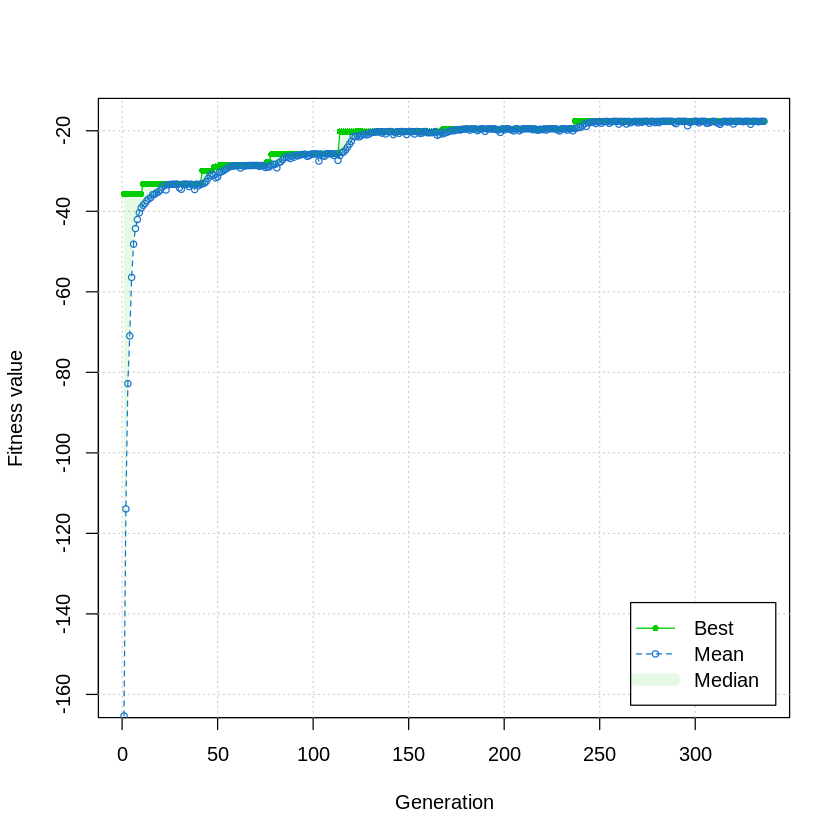

In [12]:
GA <- ga(type = "real-valued",
         fitness =  function(x) -combined(x[1], x[2], x[3], x[4]),
         lower = c(10, 10, 0.9, 0.9), upper = c(80, 50, 5, 5),
         popSize = 50, maxiter = 1000, run = 100, pcrossover = 0.75, pmutation = 0.01 )

summary(GA)
plot(GA)

When looking back at changing the weight values for the combined equation I found that better results came when the Static Deflection equation was given priority over the cross section. To find this I actually made the weight value a paramater in the genetic algorithm so it would find out what the best weight for the function would be itself.

#Assigment 5 Extra Credit


The vehicle crashworthiness problem is a three-objective problem where the crash safety level of a vehicle is optimized. A higher safety level means how well a vehicle can protect the occupants from the effects of a frontal accident.
<br>
<br>
There are three different equations that we will need to try an minimize in order to solve this problem<br>
- For the consideration of lightweight, the mass of the vehicle is set as the first design objective.
- To take into account the worst scenario of acceleration-induced biomechanical damage of occupants, an integration of collision acceleration  in the full frontal crash is the second objective.
- To consider the most severe mechanical injury, the toe board intrusion in the offset-frontal crash is regarded as the third objective.

In [26]:
#Equation for car crash
crashProtection <- function(x1, x2, x3, x4, x5)
{
  0.1*(0.33*(1640.2823+2.3573285*x1+2.3220035*x2+4.5688768*x3+7.7213633*x4+4.4559504*x5))+
  0.5*(0.33*(6.5856+1.15*x1-1.0427*x2+0.9738*x3+0.8364*x4+0.3695*x1*x4+0.0861*x1*x5+0.3628*x2*x4-0.1106*x1*x1-0.3437*x3*x3+0.1764*x5*x5))+
  0.4*(0.34*(0.0181*x1+0.1024*x2+0.0421*x3+-0.0073*x1*x2+0.024*x2*x3-0.0118*x2*x4-0.0204*x3*x4+-0.008*x3*x5-0.0241*x2*x2+0.0109*x4*x4-0.0551))
}

# Parameters constraints
x1 <- x2 <- x3 <- x4 <- x5 <- seq(1, 3, by = 0.1)

Now that our equation is defined we can run it though the Genetic Alg to see what the best result it could find is.

── Genetic Algorithm ─────────────────── 

GA settings: 
Type                  =  real-valued 
Population size       =  50 
Number of generations =  1000 
Elitism               =  2 
Crossover probability =  0.75 
Mutation probability  =  0.01 
Search domain = 
      x1 x2 x3 x4 x5
lower  1  1  1  1  1
upper  3  3  3  3  3

GA results: 
Iterations             = 431 
Fitness function value = -56.30773 
Solution = 
           x1       x2       x3       x4       x5
[1,] 1.037143 2.935837 1.004538 1.033073 1.009492

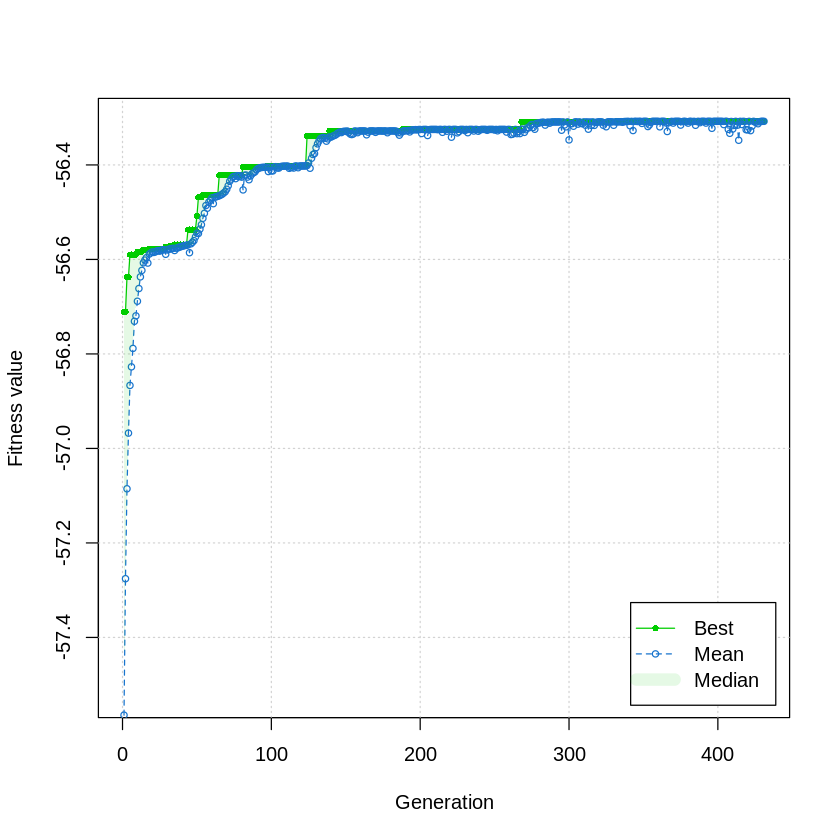

In [27]:
GA <- ga(type = "real-valued",
         fitness =  function(x) -crashProtection(x[1], x[2], x[3], x[4], x[5]),
         lower = c(1, 1, 1, 1, 1), upper = c(3 ,3 ,3 ,3 ,3),
         popSize = 50, maxiter = 1000, run = 100, pcrossover = 0.75, pmutation = 0.01 )

summary(GA)
plot(GA)

From changing the weight vales for each equation I found a an interesting trend. When you put less emphasis on the total weight of the car you get a better performace in crash worthiness. This makes sense when you apply this to the real world since stronger materials are normally heavier and if you are allowed to use them you car will as a result become stronger while also becoming heavier. There is a question which is how heavy is too heavy since while a heavy car is safer it is also not as easy to drive.